In [0]:
import json
import os
import csv
from typing import Callable

import pandas as pd
import requests

In [0]:
DATA_DIR: str = "/Users/yaminigotimukul/DataScience/Berekley/Semesters/Spring_2024/repo/alivio/data"
MX_EQ_DIR: str = f"{DATA_DIR}/xview_building_damage/csv/earthquake"    
HC_FL_DIR: str = f"{DATA_DIR}/xview_building_damage/csv/hurricane/"    
HC_HV_DIR: str = f"{DATA_DIR}/xview_building_damage/csv/hurricane/"  
HC_MW_DIR: str = f"{DATA_DIR}/xview_building_damage/csv/hurricane/"  
NEW_DATA_DIR: str = f"{DATA_DIR}/xview_building_damage/csv/"        

In [0]:
mexico_eq_damage=pd.read_csv(MX_EQ_DIR+"/train_mexico_eq_blds_damage.csv")
mexico_eq_damage.head()

,feature_type,damage_level,uid,wkt_lt_lg,lat_lng,img_name,sensor,provider_asset_type,gsd,capture_date,...,target_azimuth,disaster,disaster_type,catalog_id,original_width,original_heightwidth,height,metadata_id,wkt,wkt_xy
0,building,no-damage,28119d94-b86c-47aa-bf75-6c42a368ed0c,POLYGON ((-99.15308685010807 19.25984242069931...,"{'feature_type': 'building', 'subtype': 'no-da...",mexico-earthquake_00000164_post_disaster.png,WORLDVIEW02,WORLDVIEW02,2.650321,2017-09-20T17:46:11.000Z,...,105.50913,mexico-earthquake,earthquake,1030010072469D00,1024,1024,1024,1024,"POLYGON ((1013.214492098976 1022.976184481574,...","{'feature_type': 'building', 'subtype': 'no-da..."
1,building,no-damage,50b3ec47-afef-441a-9145-330edfb641d9,POLYGON ((-99.15304572138677 19.26399182582984...,"{'feature_type': 'building', 'subtype': 'no-da...",mexico-earthquake_00000164_post_disaster.png,WORLDVIEW02,WORLDVIEW02,2.650321,2017-09-20T17:46:11.000Z,...,105.50913,mexico-earthquake,earthquake,1030010072469D00,1024,1024,1024,1024,"POLYGON ((1022.975832794109 74.78276414569109,...","{'feature_type': 'building', 'subtype': 'no-da..."
2,building,no-damage,7c94a152-05cb-4d2e-9a99-e827e4538046,POLYGON ((-99.15313713712854 19.26389313991497...,"{'feature_type': 'building', 'subtype': 'no-da...",mexico-earthquake_00000164_post_disaster.png,WORLDVIEW02,WORLDVIEW02,2.650321,2017-09-20T17:46:11.000Z,...,105.50913,mexico-earthquake,earthquake,1030010072469D00,1024,1024,1024,1024,"POLYGON ((1003.117292562625 97.31649192069297,...","{'feature_type': 'building', 'subtype': 'no-da..."
3,building,no-damage,37c80881-34c7-4970-8dfe-cd2bfd918034,POLYGON ((-99.15362687007375 19.26403145735543...,"{'feature_type': 'building', 'subtype': 'no-da...",mexico-earthquake_00000164_post_disaster.png,WORLDVIEW02,WORLDVIEW02,2.650321,2017-09-20T17:46:11.000Z,...,105.50913,mexico-earthquake,earthquake,1030010072469D00,1024,1024,1024,1024,"POLYGON ((896.8654319496612 65.61500846844616,...","{'feature_type': 'building', 'subtype': 'no-da..."
4,building,no-damage,4b0a2020-ecf2-420e-8499-97df109b7e2c,POLYGON ((-99.15378920194375 19.26417265095659...,"{'feature_type': 'building', 'subtype': 'no-da...",mexico-earthquake_00000164_post_disaster.png,WORLDVIEW02,WORLDVIEW02,2.650321,2017-09-20T17:46:11.000Z,...,105.50913,mexico-earthquake,earthquake,1030010072469D00,1024,1024,1024,1024,"POLYGON ((861.6654414518277 33.31896470811938,...","{'feature_type': 'building', 'subtype': 'no-da..."


In [0]:
values = mexico_eq_damage['damage_level'].value_counts().keys().tolist()
counts = mexico_eq_damage['damage_level'].value_counts().tolist()
damage_counts=pd.DataFrame(list(zip(values, counts)),
               columns =['damage_level', 'counts'], index=values)

,damage_level,counts
no-damage,no-damage,32063
minor-damage,minor-damage,110
un-classified,un-classified,75
major-damage,major-damage,18
destroyed,destroyed,2


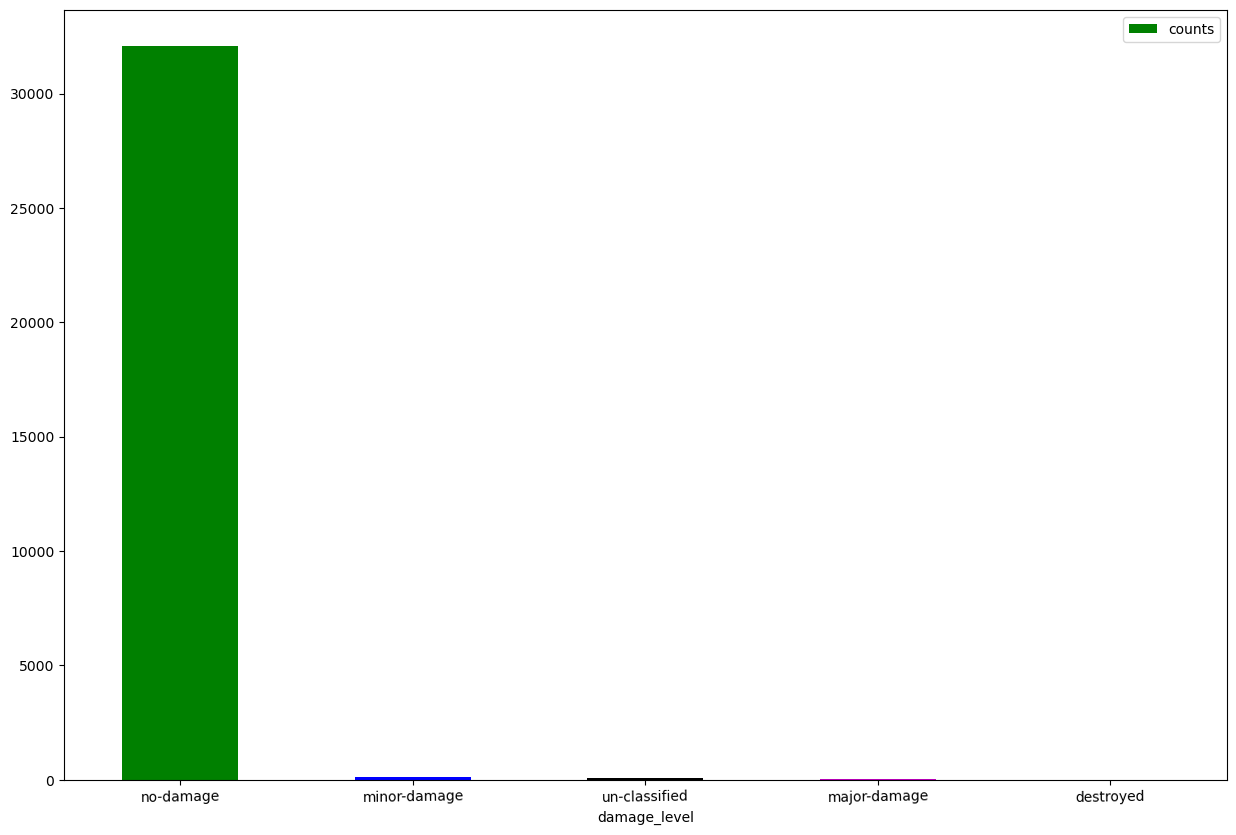

In [0]:
ax = damage_counts.plot.bar(x='damage_level', y='counts', rot=1, figsize=(15, 10), color=['g', 'b', 'k', 'm','y'])
damage_counts

## Hurricane florence - building Damage

In [0]:
hc_fl_damage=pd.read_csv(HC_FL_DIR+"/train_huricane_florence.csv")
hc_fl_damage.head()

,feature_type,damage_level,uid,wkt_lt_lg,lat_lng,img_name,sensor,provider_asset_type,gsd,capture_date,...,target_azimuth,disaster,disaster_type,catalog_id,original_width,original_heightwidth,height,metadata_id,wkt,wkt_xy
0,building,minor-damage,61e6c19b-8adf-4f85-ab44-048b53395143,"POLYGON ((-77.90764031921604 34.8103647423034,...","{'feature_type': 'building', 'subtype': 'minor...",hurricane-florence_00000538_post_disaster.png,GEOEYE01,GEOEYE01,2.091625,2018-09-20T16:04:41.000Z,...,190.82309,hurricane-florence,flooding,1050010012411600,1024,1024,1024,1024,"POLYGON ((92.99243866758681 826.8137930208385,...","{'feature_type': 'building', 'subtype': 'minor..."
1,building,un-classified,bf2b217e-2c69-454e-af1d-2abe6265e3cd,POLYGON ((-77.90808191579313 34.80973024327165...,"{'feature_type': 'building', 'subtype': 'un-cl...",hurricane-florence_00000538_post_disaster.png,GEOEYE01,GEOEYE01,2.091625,2018-09-20T16:04:41.000Z,...,190.82309,hurricane-florence,flooding,1050010012411600,1024,1024,1024,1024,POLYGON ((-8.769107114089246e-06 978.457033399...,"{'feature_type': 'building', 'subtype': 'un-cl..."
2,building,un-classified,debd9427-5951-4882-9757-046aee1652de,POLYGON ((-77.90599617852514 34.81234820561588...,"{'feature_type': 'building', 'subtype': 'un-cl...",hurricane-florence_00000538_post_disaster.png,GEOEYE01,GEOEYE01,2.091625,2018-09-20T16:04:41.000Z,...,190.82309,hurricane-florence,flooding,1050010012411600,1024,1024,1024,1024,"POLYGON ((436.5393400504175 354.3019833824924,...","{'feature_type': 'building', 'subtype': 'un-cl..."
3,building,major-damage,339288fc-f2ac-47e0-917a-4e4c2b882ad0,"POLYGON ((-77.93204432743376 34.7115455171975,...","{'feature_type': 'building', 'subtype': 'major...",hurricane-florence_00000252_post_disaster.png,GEOEYE01,GEOEYE01,2.091625,2018-09-20T16:04:41.000Z,...,190.82309,hurricane-florence,flooding,1050010012411600,1024,1024,1024,1024,"POLYGON ((872.3163285131064 409.5181644413699,...","{'feature_type': 'building', 'subtype': 'major..."
4,building,un-classified,3bd12171-3421-4727-aa3d-612f278c7ac0,POLYGON ((-78.95302080681131 33.65446865832116...,"{'feature_type': 'building', 'subtype': 'un-cl...",hurricane-florence_00000028_post_disaster.png,GEOEYE01,GEOEYE01,2.895928,2018-09-18T16:32:47.000Z,...,69.02214,hurricane-florence,flooding,10500100123A5000,1024,1024,1024,1024,"POLYGON ((3.87645987039575 932.0996923560847, ...","{'feature_type': 'building', 'subtype': 'un-cl..."


,damage_level,counts
no-damage,no-damage,4689
major-damage,major-damage,1245
un-classified,un-classified,326
minor-damage,minor-damage,132
destroyed,destroyed,54


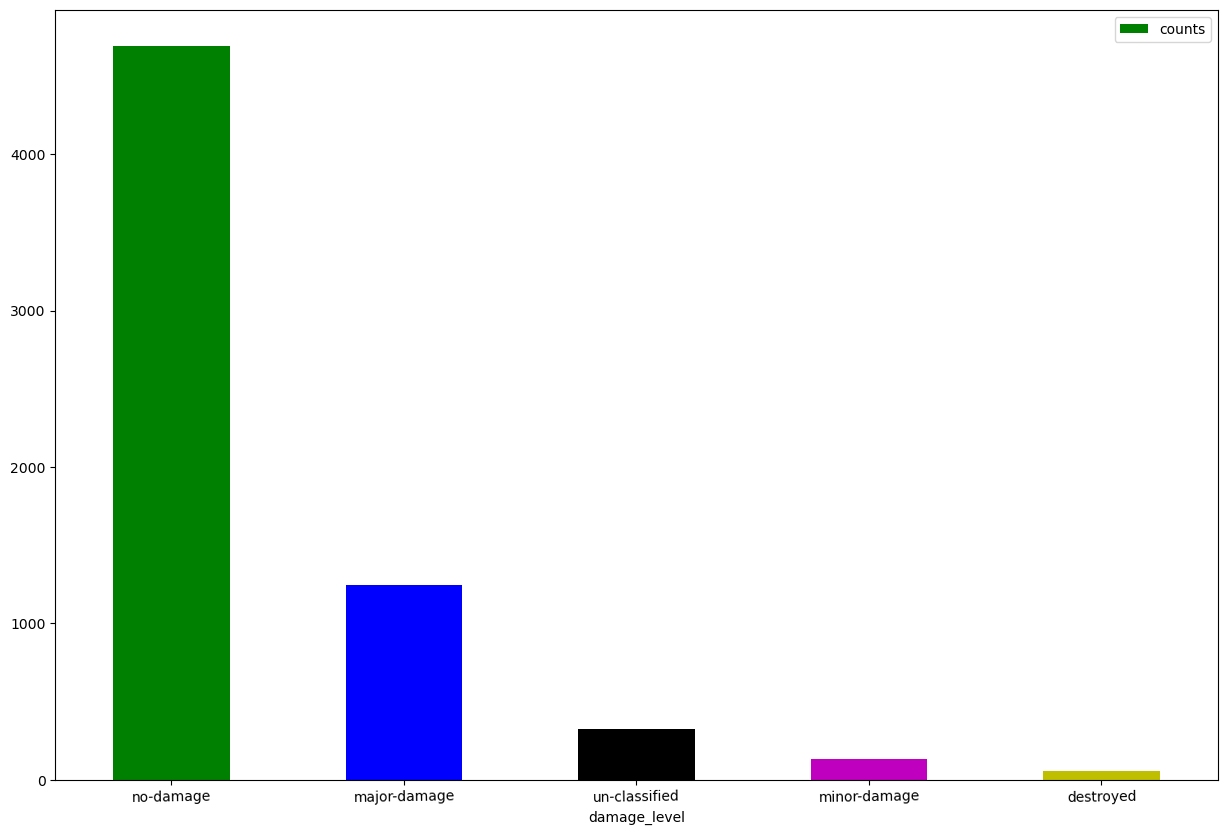

In [0]:
values = hc_fl_damage['damage_level'].value_counts().keys().tolist()
counts = hc_fl_damage['damage_level'].value_counts().tolist()
damage_counts=pd.DataFrame(list(zip(values, counts)),
               columns =['damage_level', 'counts'], index=values)
ax = damage_counts.plot.bar(x='damage_level', y='counts', rot=1, figsize=(15, 10), color=['g', 'b', 'k', 'm','y'])
damage_counts

## Hurricane Harvey - building Damage

,damage_level,counts
no-damage,no-damage,11423
major-damage,major-damage,8238
minor-damage,minor-damage,2663
destroyed,destroyed,401
un-classified,un-classified,289


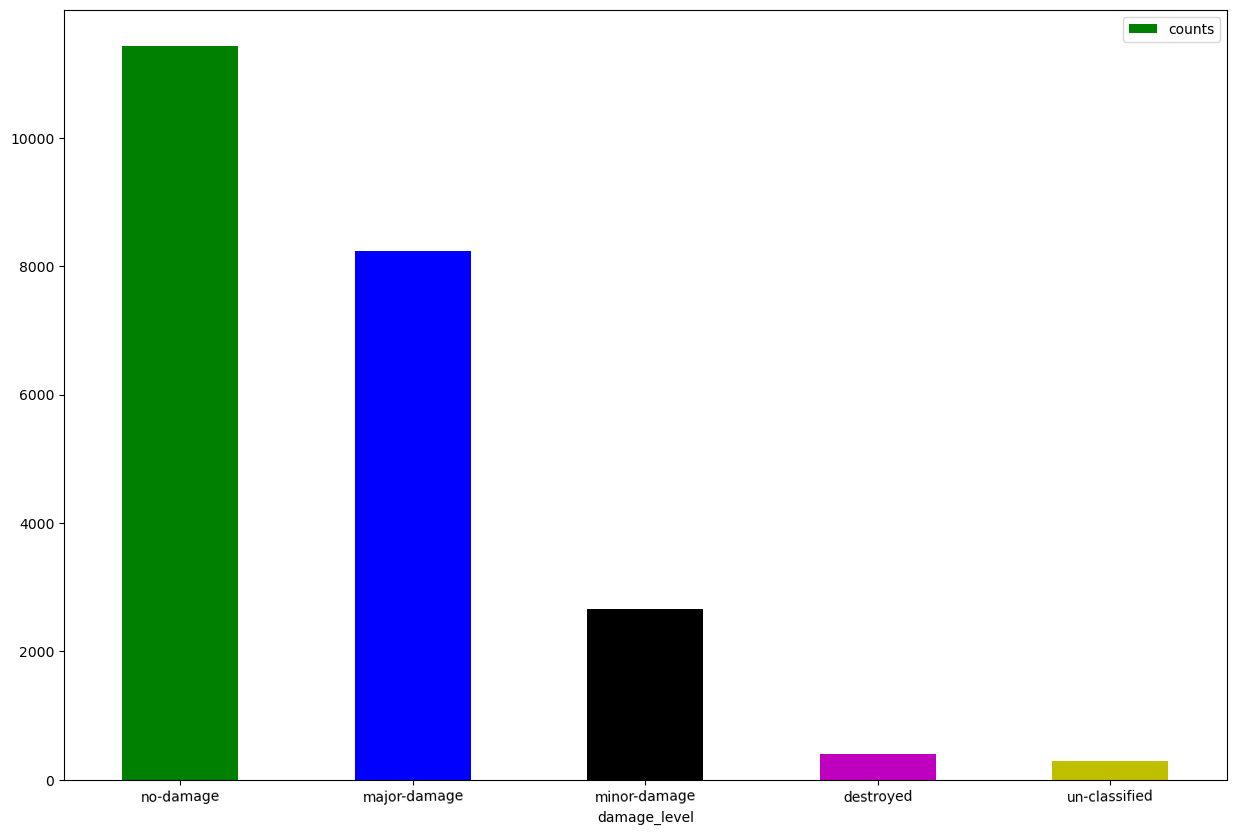

In [0]:
hc_hv_damage=pd.read_csv(HC_HV_DIR+"/train_huricane_harvey.csv")
values = hc_hv_damage['damage_level'].value_counts().keys().tolist()
counts = hc_hv_damage['damage_level'].value_counts().tolist()
damage_counts=pd.DataFrame(list(zip(values, counts)),
               columns =['damage_level', 'counts'], index=values)
ax = damage_counts.plot.bar(x='damage_level', y='counts', rot=1, figsize=(15, 10), color=['g', 'b', 'k', 'm','y'])
damage_counts

## Hurricane Matthew - building Damage


,damage_level,counts
minor-damage,minor-damage,6451
no-damage,no-damage,2512
destroyed,destroyed,2144
major-damage,major-damage,1943
un-classified,un-classified,784


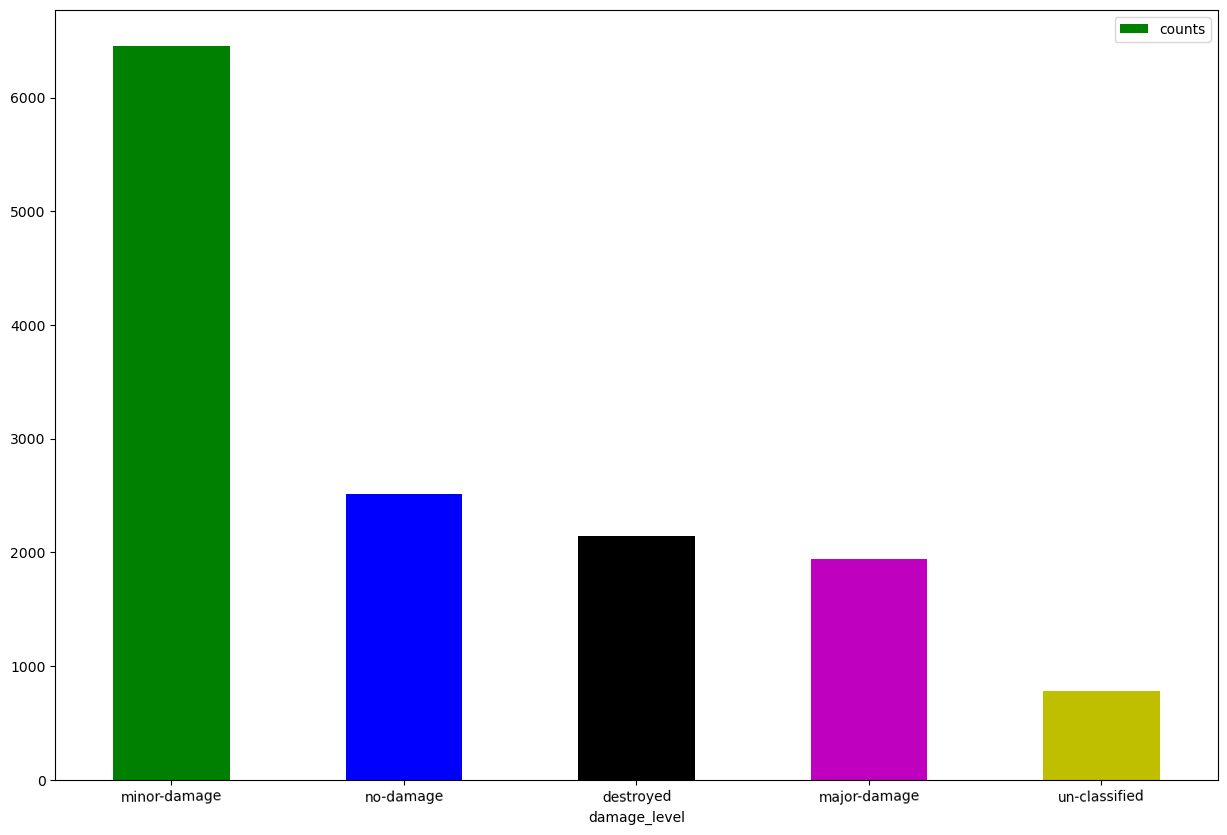

In [0]:

hc_mw_damage=pd.read_csv(HC_MW_DIR+"/train_huricane_matthew.csv")
values = hc_mw_damage['damage_level'].value_counts().keys().tolist()
counts = hc_mw_damage['damage_level'].value_counts().tolist()
damage_counts=pd.DataFrame(list(zip(values, counts)),
               columns =['damage_level', 'counts'], index=values)
ax = damage_counts.plot.bar(x='damage_level', y='counts', rot=1, figsize=(15, 10), color=['g', 'b', 'k', 'm','y'])
damage_counts

## Hurricane Micheal - building Damage

,damage_level,counts
no-damage,no-damage,14591
minor-damage,minor-damage,5304
major-damage,major-damage,1904
destroyed,destroyed,760
un-classified,un-classified,232


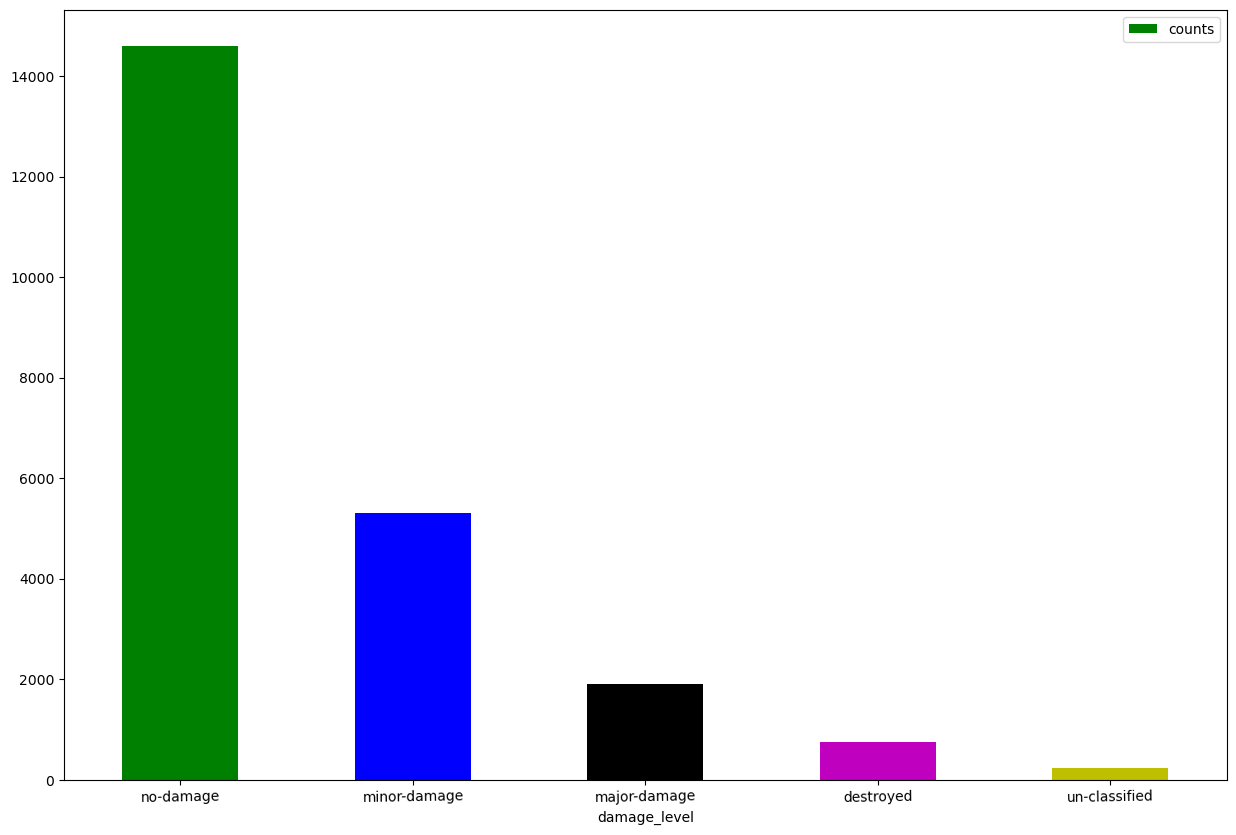

In [0]:
hc_mw_damage=pd.read_csv(NEW_DATA_DIR+"train_hurricane_micheal.csv")
values = hc_mw_damage['damage_level'].value_counts().keys().tolist()
counts = hc_mw_damage['damage_level'].value_counts().tolist()
damage_counts=pd.DataFrame(list(zip(values, counts)),
               columns =['damage_level', 'counts'], index=values)
ax = damage_counts.plot.bar(x='damage_level', y='counts', rot=1, figsize=(15, 10), color=['g', 'b', 'k', 'm','y'])
damage_counts

## Midwest - flooding

,damage_level,counts
no-damage,no-damage,8128
un-classified,un-classified,285
minor-damage,minor-damage,149
major-damage,major-damage,119
destroyed,destroyed,75


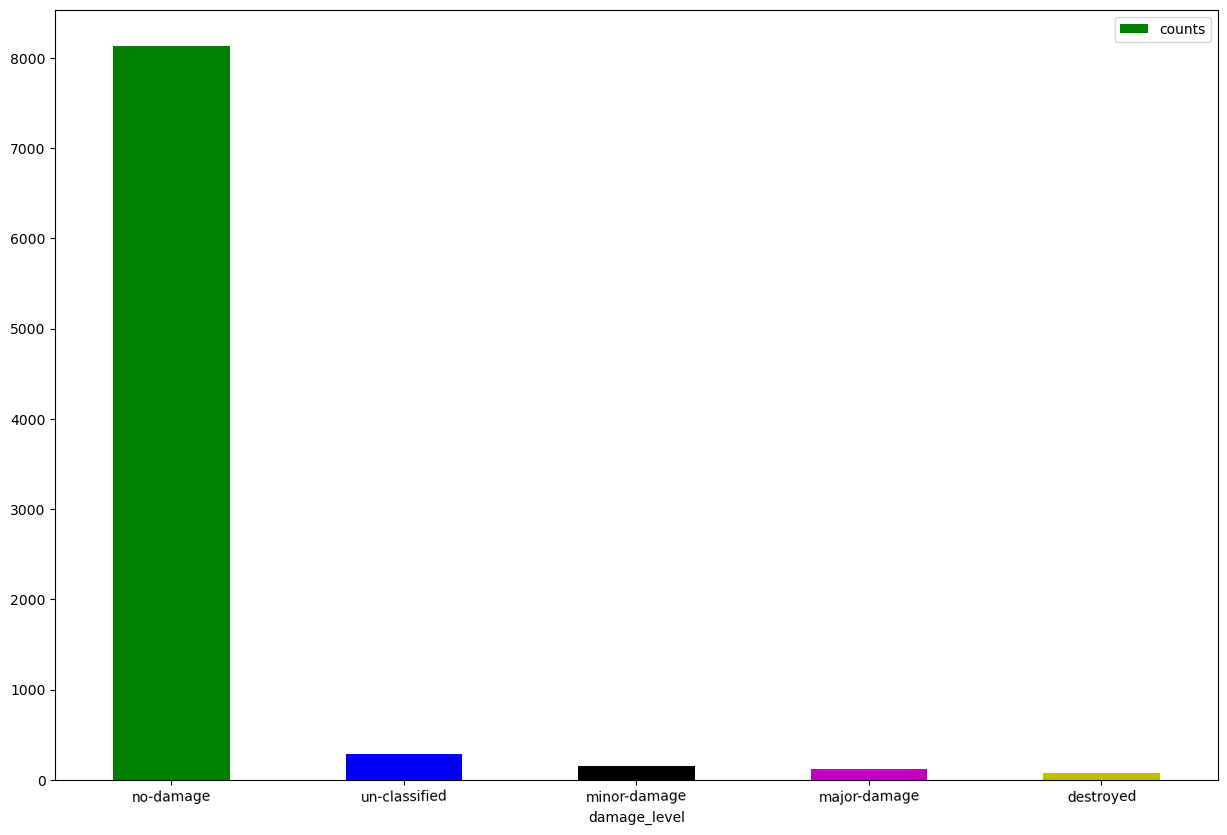

In [0]:
hc_mw_damage=pd.read_csv(NEW_DATA_DIR+"train_midwest_flooding.csv")
values = hc_mw_damage['damage_level'].value_counts().keys().tolist()
counts = hc_mw_damage['damage_level'].value_counts().tolist()
damage_counts=pd.DataFrame(list(zip(values, counts)),
               columns =['damage_level', 'counts'], index=values)
ax = damage_counts.plot.bar(x='damage_level', y='counts', rot=1, figsize=(15, 10), color=['g', 'b', 'k', 'm','y'])
damage_counts

## Palu - Tsunami

,damage_level,counts
no-damage,no-damage,25455
destroyed,destroyed,4966
major-damage,major-damage,571
un-classified,un-classified,401
minor-damage,minor-damage,1


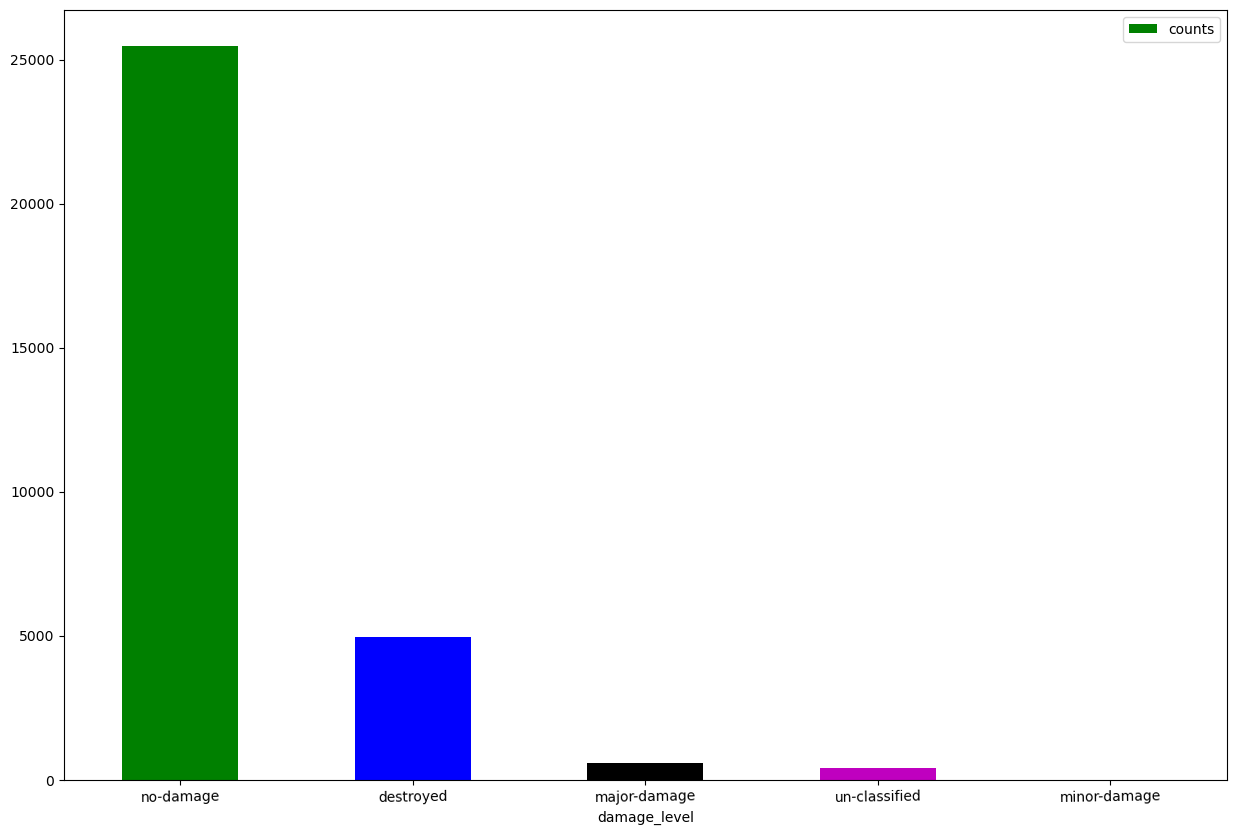

In [0]:
hc_mw_damage=pd.read_csv(NEW_DATA_DIR+"train_palu_tsunami.csv")
values = hc_mw_damage['damage_level'].value_counts().keys().tolist()
counts = hc_mw_damage['damage_level'].value_counts().tolist()
damage_counts=pd.DataFrame(list(zip(values, counts)),
               columns =['damage_level', 'counts'], index=values)
ax = damage_counts.plot.bar(x='damage_level', y='counts', rot=1, figsize=(15, 10), color=['g', 'b', 'k', 'm','y'])
damage_counts

## Santa Rosa Wildfire

,damage_level,counts
no-damage,no-damage,9285
destroyed,destroyed,3471
minor-damage,minor-damage,78
major-damage,major-damage,63
un-classified,un-classified,53


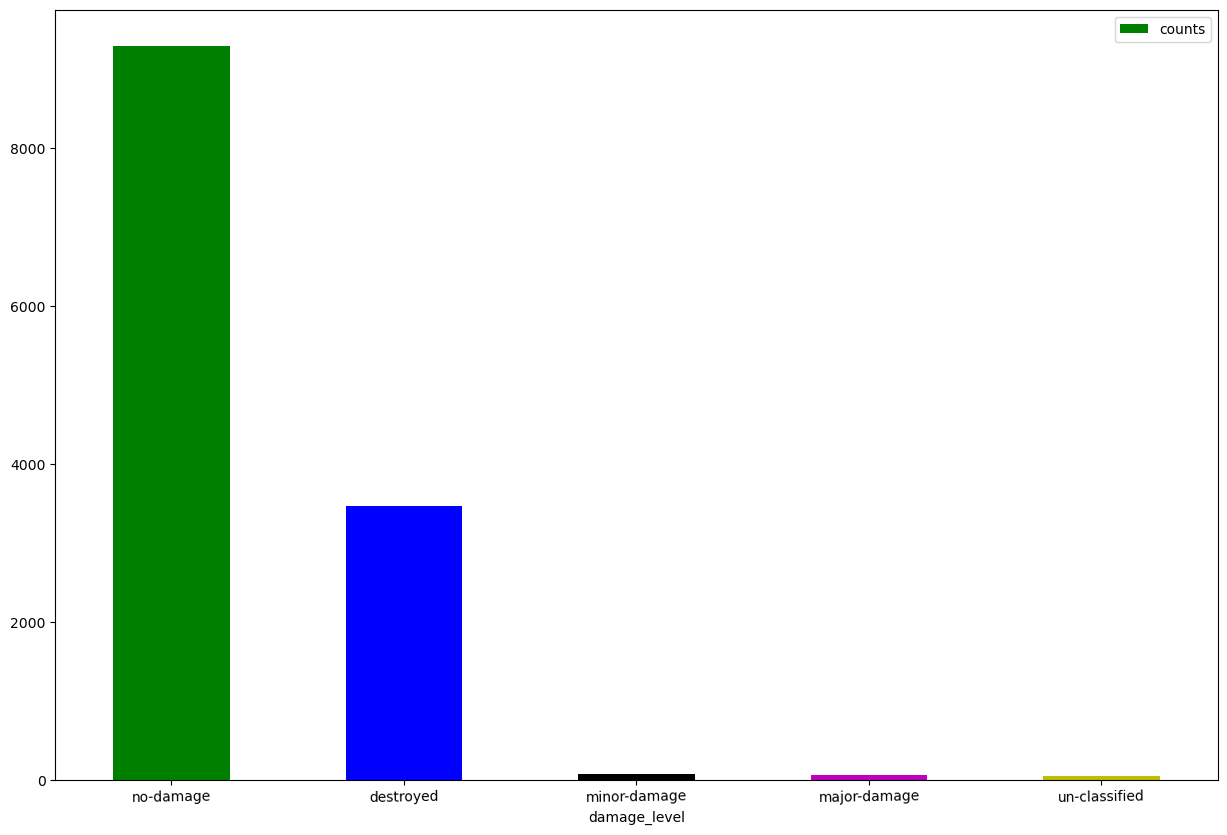

In [0]:
hc_mw_damage=pd.read_csv(NEW_DATA_DIR+"train_santa_rosa_wildfire.csv")
values = hc_mw_damage['damage_level'].value_counts().keys().tolist()
counts = hc_mw_damage['damage_level'].value_counts().tolist()
damage_counts=pd.DataFrame(list(zip(values, counts)),
               columns =['damage_level', 'counts'], index=values)
ax = damage_counts.plot.bar(x='damage_level', y='counts', rot=1, figsize=(15, 10), color=['g', 'b', 'k', 'm','y'])
damage_counts

## Socal Fire

,damage_level,counts
no-damage,no-damage,8638
destroyed,destroyed,1329
un-classified,un-classified,374
minor-damage,minor-damage,83
major-damage,major-damage,51


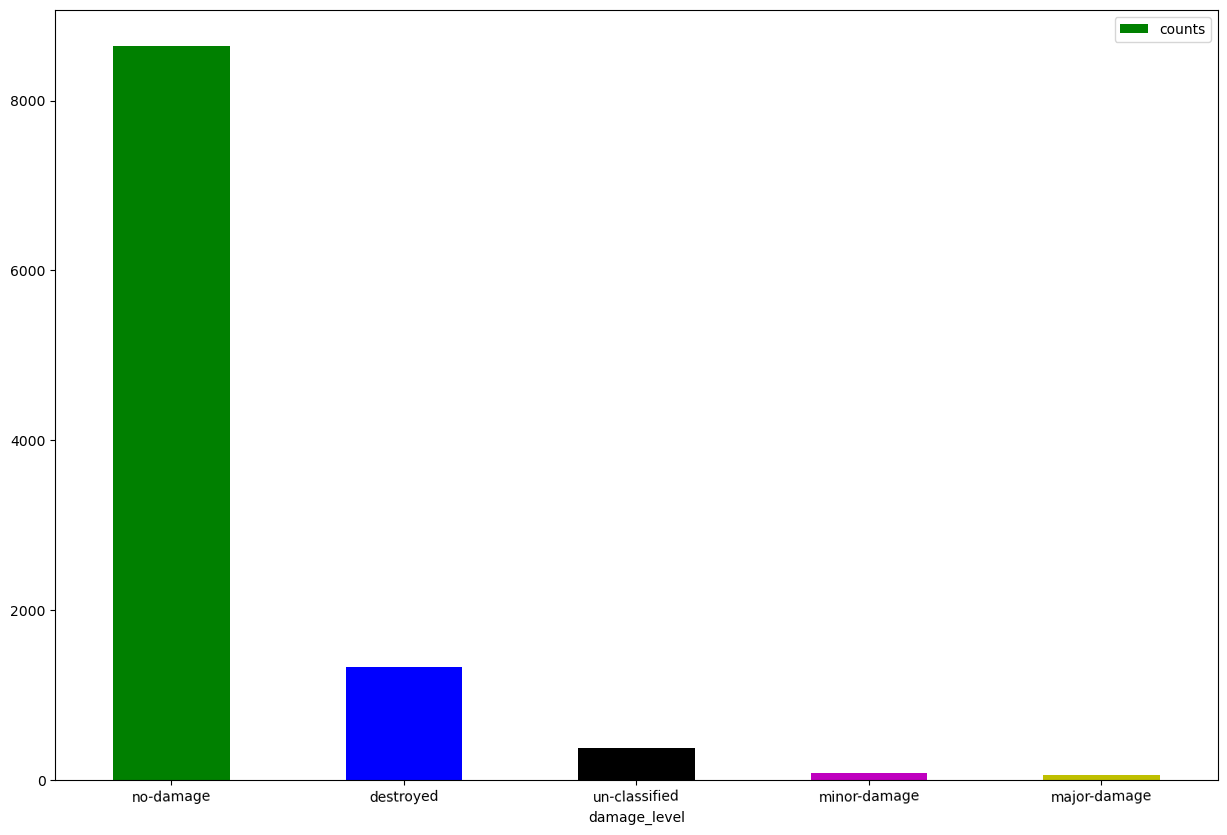

In [0]:

hc_mw_damage=pd.read_csv(NEW_DATA_DIR+"train_socal-fire.csv")
values = hc_mw_damage['damage_level'].value_counts().keys().tolist()
counts = hc_mw_damage['damage_level'].value_counts().tolist()
damage_counts=pd.DataFrame(list(zip(values, counts)),
               columns =['damage_level', 'counts'], index=values)
ax = damage_counts.plot.bar(x='damage_level', y='counts', rot=1, figsize=(15, 10), color=['g', 'b', 'k', 'm','y'])
damage_counts

## Volcano Guatemala

,damage_level,counts
no-damage,no-damage,13879
un-classified,un-classified,1851
destroyed,destroyed,300
minor-damage,minor-damage,230
major-damage,major-damage,200
damage_level,damage_level,9


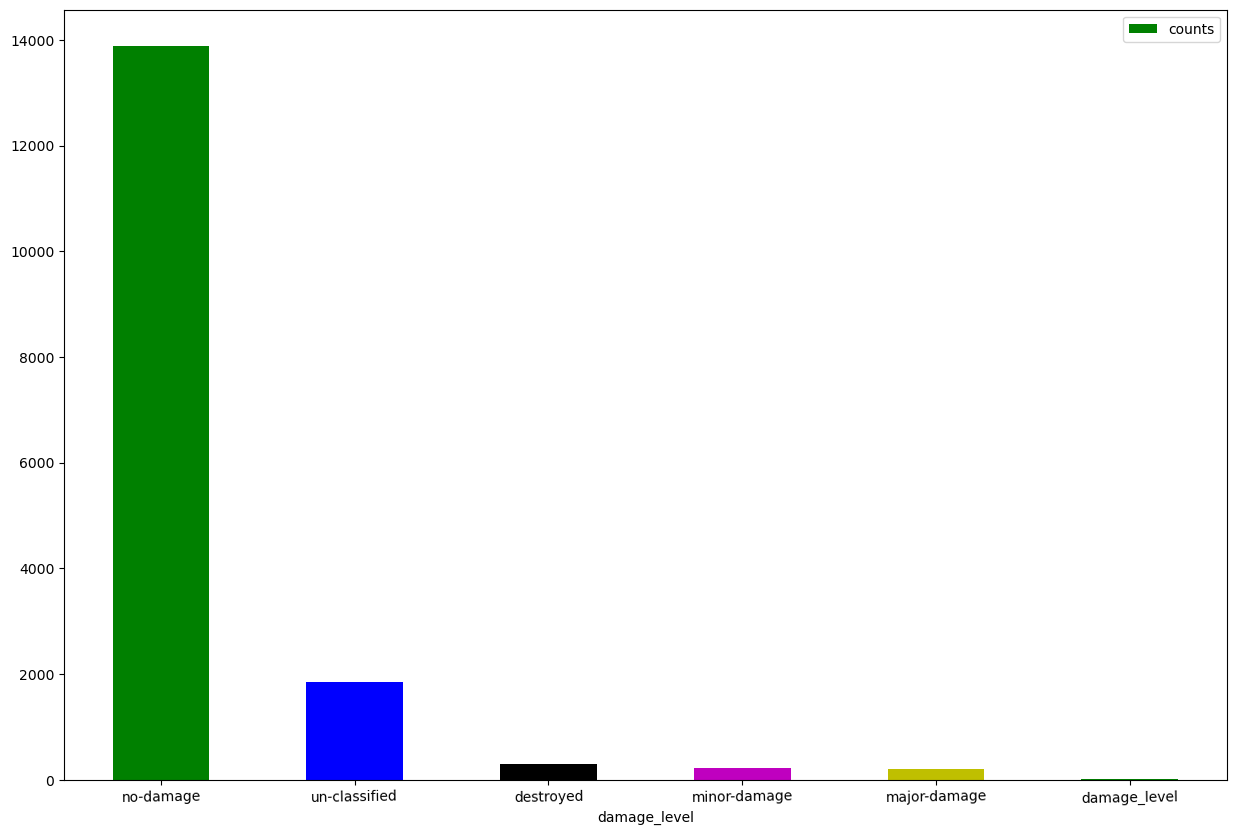

In [0]:
hc_mw_damage=pd.read_csv(NEW_DATA_DIR+"train_volcano_guatemala.csv")
values = hc_mw_damage['damage_level'].value_counts().keys().tolist()
counts = hc_mw_damage['damage_level'].value_counts().tolist()
damage_counts=pd.DataFrame(list(zip(values, counts)),
               columns =['damage_level', 'counts'], index=values)
ax = damage_counts.plot.bar(x='damage_level', y='counts', rot=1, figsize=(15, 10), color=['g', 'b', 'k', 'm','y'])
damage_counts